In [1]:
#import all necessary packages
import os
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import sklearn
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from  matplotlib import pyplot
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
os.chdir("C:\\Users\\vgonsalv\\Desktop\\DataScience\\Edwisor\\project\\project 2--Cab Fare Prediction\\Project Cab Fare Prediction--Vijay Gonsalves")
os.getcwd()

'C:\\Users\\vgonsalv\\Desktop\\DataScience\\Edwisor\\project\\project 2--Cab Fare Prediction\\Project Cab Fare Prediction--Vijay Gonsalves'

In [3]:
Cab_Train=pd.read_csv('train_cab.csv',header=0,na_values=["", " ", "NA","0","NaN"])

In [4]:
Cab_Train

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1.0
8,NaN,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1.0
9,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2.0


In [5]:
Cab_Train = Cab_Train[Cab_Train.pickup_datetime != '43']

In [6]:
def breakdatetime(df):
    df["pickup_datetime"] = df["pickup_datetime"].map(lambda x: str(x)[:-3])
    df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"], format='%Y-%m-%d %H:%M:%S')
    df['year'] = df.pickup_datetime.dt.year
    df['month'] = df.pickup_datetime.dt.month
    df['day'] = df.pickup_datetime.dt.day
    df['weekday'] = df.pickup_datetime.dt.weekday
    df['hour'] = df.pickup_datetime.dt.hour
    return(df["pickup_datetime"].head())    
print(breakdatetime(Cab_Train))
Cab_Train.drop('pickup_datetime', axis=1, inplace=True)


C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

0   2009-06-15 17:26:21
1   2010-01-05 16:52:16
2   2011-08-18 00:35:00
3   2012-04-21 04:30:42
4   2010-03-09 07:51:00
Name: pickup_datetime, dtype: datetime64[ns]


C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [7]:
def get_time_of_day(x):
    ''' for Timeofday hour column '''
    if (x >=3) and (x < 9):
        return 'Morning'
    elif (x >=9) and (x <=14 ):
        return 'Mid-Day'
    elif (x >= 14) and (x <= 18):
        return'Evening'
    else:
        return 'Night'

In [8]:
Cab_Train['timeofday'] = Cab_Train['hour'].apply(get_time_of_day)

C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
Cab_Train.dtypes

fare_amount           object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
year                   int64
month                  int64
day                    int64
weekday                int64
hour                   int64
timeofday             object
dtype: object

In [10]:
Cab_Train['fare_amount'] =  Cab_Train['fare_amount'].astype(float)
Cab_Train['year'] =  Cab_Train['year'].astype(object)
Cab_Train['passenger_count'] =  Cab_Train['passenger_count'].astype(int)
Cab_Train['month'] =  Cab_Train['month'].astype(object)
Cab_Train['day'] =  Cab_Train['day'].astype(object)
Cab_Train['hour'] =  Cab_Train['hour'].astype(object)
Cab_Train['weekday'] =  Cab_Train['weekday'].astype(object)
Cab_Train['abs_long'] =  Cab_Train['abs_long'].astype(object)


ValueError: could not convert string to float: '430-'

In [11]:
print(Cab_Train.index[Cab_Train.fare_amount == '430-'])

Int64Index([1123], dtype='int64')


In [12]:
Cab_Train['fare_amount'].loc[1123]=np.nan

C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
Cab_Train["fare_amount"] = pd.to_numeric(Cab_Train["fare_amount"],errors = "coerce")
Cab_Train['year'] =  Cab_Train['year'].astype(object)
Cab_Train["passenger_count"] = pd.to_numeric(Cab_Train["passenger_count"],errors = "coerce")
Cab_Train['month'] =  Cab_Train['month'].astype(object)
Cab_Train['day'] =  Cab_Train['day'].astype(object)
Cab_Train['hour'] =  Cab_Train['hour'].astype(object)
Cab_Train['weekday'] =  Cab_Train['weekday'].astype(object) 
Cab_Train.dtypes

C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
year                  object
month                 object
day                   object
weekday               object
hour                  object
timeofday             object
dtype: object

In [14]:
Cab_Train['timeofday'] =  pd.Categorical(Cab_Train['timeofday'])
Cab_Train['timeofday']=Cab_Train['timeofday'].cat.codes
Cab_Train['timeofday'] =  Cab_Train['timeofday'].astype(object)

C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [15]:
Cab_Train.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
year                  object
month                 object
day                   object
weekday               object
hour                  object
timeofday             object
dtype: object

In [16]:
Cab_Train['fare_amount'].describe()

count    16040.000000
mean        15.016160
std        430.487765
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

In [17]:
Cab_Train['fare_amount'][(Cab_Train['fare_amount']<=0)]= np.nan
Cab_Train['pickup_longitude'][Cab_Train['pickup_longitude']<=-180] = np.nan
Cab_Train['pickup_longitude'][Cab_Train['pickup_longitude']>=180] = np.nan
Cab_Train['pickup_latitude'][Cab_Train['pickup_latitude']<=-90] = np.nan
Cab_Train['pickup_latitude'][Cab_Train['pickup_latitude']>=90] = np.nan
Cab_Train['dropoff_longitude'][Cab_Train['dropoff_longitude']<=-180] = np.nan
Cab_Train['dropoff_longitude'][Cab_Train['dropoff_longitude']>=180] = np.nan
Cab_Train['dropoff_latitude'][Cab_Train['dropoff_latitude']<=-90] = np.nan
Cab_Train['dropoff_latitude'][Cab_Train['dropoff_latitude']>=90] = np.nan

C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.htm

In [18]:
 Cab_Train = Cab_Train.drop(Cab_Train[(Cab_Train["pickup_latitude"] == Cab_Train["dropoff_latitude"])&(Cab_Train["pickup_longitude"] == Cab_Train["dropoff_longitude"])].index, axis=0)

In [19]:
Cab_Train = Cab_Train.drop(Cab_Train[(Cab_Train["passenger_count"] >6)|(Cab_Train["passenger_count"] <1)].index, axis=0)

In [20]:
Cab_Train["passenger_count"].value_counts()

1.0    11143
2.0     2299
5.0     1037
3.0      670
4.0      327
6.0      301
1.3        1
Name: passenger_count, dtype: int64

In [21]:
Cab_Train["passenger_count"] = round(Cab_Train["passenger_count"])

In [22]:
Cab_Train["pickup_latitude"].describe()
Cab_Train["dropoff_latitude"].describe()
Cab_Train["pickup_longitude"].describe()
Cab_Train["dropoff_longitude"].describe()

count    15577.000000
mean       -73.906299
std          2.718088
min        -74.227047
25%        -73.991377
50%        -73.980582
75%        -73.965492
max         40.802437
Name: dropoff_longitude, dtype: float64

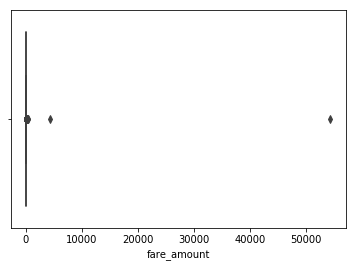

In [23]:
sns.boxplot(x=Cab_Train['fare_amount'])

In [24]:
Cab_Train.fare_amount.quantile([0.25,0.75])


0.25     6.0
0.75    12.5
Name: fare_amount, dtype: float64

In [25]:
#iqr=q75-q25
iqr = 12.5 - 6
#  min = q25 - (iqr*1.5)
#max = q75 + (iqr*1.5)
min = 6 - (iqr*1.5)
max = 12.5 + (iqr*1.5)
print(min)
print(max)
Cab_Train['fare_amount'][Cab_Train['fare_amount']<-3.75] = np.nan
Cab_Train['fare_amount'][Cab_Train['fare_amount']>22.25] = np.nan

-3.75
22.25


C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


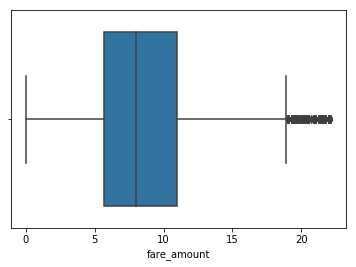

In [26]:
sns.boxplot(x=Cab_Train['fare_amount'])

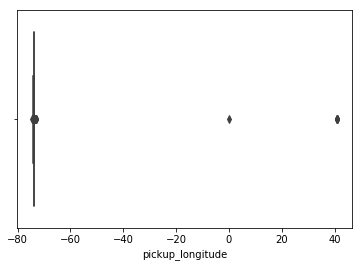

In [27]:
sns.boxplot(x=Cab_Train['pickup_longitude'])

In [28]:
Cab_Train["pickup_longitude"].describe()

count    15576.000000
mean       -73.911519
std          2.666248
min        -74.438233
25%        -73.992402
50%        -73.982075
75%        -73.968164
max         40.766125
Name: pickup_longitude, dtype: float64

In [29]:
#iqr=q75-q25
iqr = -73.968164 - (-73.992402)
# min = q25 - (iqr*1.5)
#max = q75 + (iqr*1.5)
min = -73.992402 - (iqr*1.5)
max = -73.968164 + (iqr*1.5)
print(min)
print(max)
Cab_Train['pickup_longitude'][Cab_Train['pickup_longitude']<-74.028759] = np.nan
Cab_Train['pickup_longitude'][Cab_Train['pickup_longitude']>-73.931807] = np.nan


-74.028759
-73.931807


C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


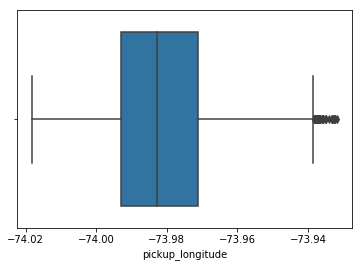

In [30]:
sns.boxplot(x=Cab_Train['pickup_longitude'])

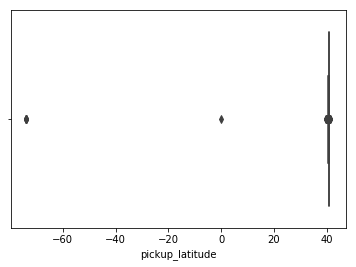

In [31]:
sns.boxplot(x=Cab_Train['pickup_latitude'])


In [32]:
Cab_Train["pickup_latitude"].describe()

count    15575.000000
mean        40.689200
std          2.620477
min        -74.006893
25%         40.736553
50%         40.753326
75%         40.767799
max         41.366138
Name: pickup_latitude, dtype: float64

In [33]:
#iqr=q75-q25
iqr = 40.767799 - (40.736553)
# min = q25 - (iqr*1.5)
#max = q75 + (iqr*1.5)
min = 40.736553 - (iqr*1.5)
max = 40.767799 + (iqr*1.5)
print(min)
print(max)

Cab_Train['pickup_latitude'][Cab_Train['pickup_latitude']<40.68968400000001] = np.nan
Cab_Train['pickup_latitude'][Cab_Train['pickup_latitude']>40.81466799999999] = np.nan

40.68968400000001
40.81466799999999


C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


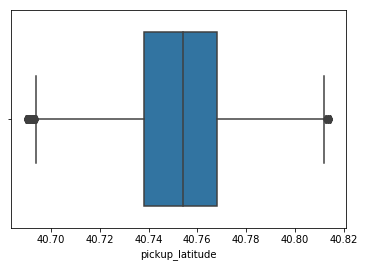

In [34]:
sns.boxplot(x=Cab_Train['pickup_latitude'])

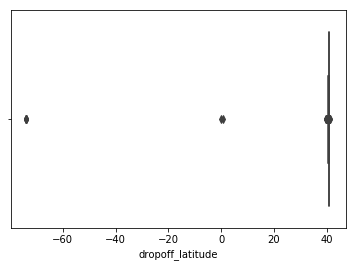

In [35]:
sns.boxplot(x=Cab_Train['dropoff_latitude'])

In [36]:
Cab_Train["dropoff_latitude"].describe()

count    15579.000000
mean        40.687153
std          2.639286
min        -74.006377
25%         40.736274
50%         40.754255
75%         40.768322
max         41.366138
Name: dropoff_latitude, dtype: float64

In [37]:
#iqr=q75-q25
iqr = 40.768322 - (40.736274)
# min = q25 - (iqr*1.5)
#max = q75 + (iqr*1.5)
min = 40.736274 - (iqr*1.5)
max = 40.768322 + (iqr*1.5)
print(min)
print(max)

Cab_Train['dropoff_latitude'][Cab_Train['dropoff_latitude']<40.688202000000004] = np.nan
Cab_Train['dropoff_latitude'][Cab_Train['dropoff_latitude']>40.81639399999999] = np.nan


40.688202000000004
40.81639399999999


C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


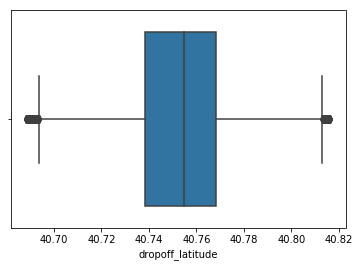

In [38]:
sns.boxplot(x=Cab_Train['dropoff_latitude'])

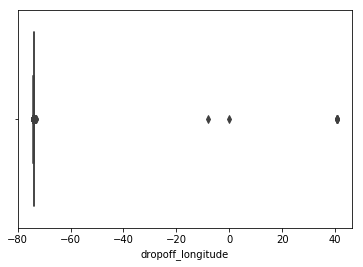

In [39]:
sns.boxplot(x=Cab_Train['dropoff_longitude'])

In [40]:
Cab_Train["dropoff_longitude"].describe()

count    15577.000000
mean       -73.906299
std          2.718088
min        -74.227047
25%        -73.991377
50%        -73.980582
75%        -73.965492
max         40.802437
Name: dropoff_longitude, dtype: float64

In [41]:
#iqr=q75-q25
iqr = -73.965492 - (-73.991377)
# min = q25 - (iqr*1.5)
#max = q75 + (iqr*1.5)
min = -73.991377 - (iqr*1.5)
max = -73.965492 + (iqr*1.5)
print(min)
print(max)
Cab_Train['dropoff_longitude'][Cab_Train['dropoff_longitude']<-74.0302045] = np.nan
Cab_Train['dropoff_longitude'][Cab_Train['dropoff_longitude']>-73.92666449999999] = np.nan

-74.0302045
-73.92666449999999


C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


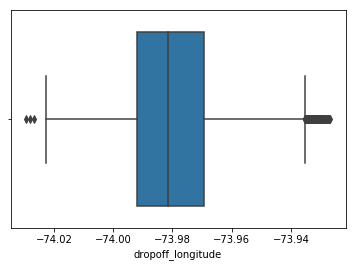

In [42]:
sns.boxplot(x=Cab_Train['dropoff_longitude'])

In [43]:
missing_val=pd.DataFrame(Cab_Train.isnull().sum())

In [44]:
missing_val

,0
fare_amount,1414
pickup_longitude,1092
pickup_latitude,808
dropoff_longitude,1207
dropoff_latitude,1045
passenger_count,111
year,0
month,0
day,0
weekday,0


In [45]:
missing_val = missing_val.reset_index()

#Renaming Variable
missing_val = missing_val.rename(columns = {'index':'Variable Name', 0 : 'Missing-Percentage'})

#Calculating Missing Value Percentage
missing_val['Missing-Percentage'] = (missing_val['Missing-Percentage']/len(Cab_Train))*100

In [46]:
missing_val

,Variable Name,Missing-Percentage
0,fare_amount,8.899238
1,pickup_longitude,6.872679
2,pickup_latitude,5.085279
3,dropoff_longitude,7.596450
4,dropoff_latitude,6.576877
5,passenger_count,0.698597
6,year,0.000000
7,month,0.000000
8,day,0.000000
9,weekday,0.000000


In [47]:
copy_df=Cab_Train.copy()
copy_df['fare_amount'].loc[108] = np.nan #value=12.9

#Impute with mean..value 8.922
copy_df['fare_amount'] = copy_df['fare_amount'].fillna(copy_df['fare_amount'].mean())
copy_df=Cab_Train.copy()
copy_df['fare_amount'].loc[108] = np.nan
#Impute with median..value 8.0
copy_df['fare_amount'] = copy_df['fare_amount'].fillna(copy_df['fare_amount'].median())
Cab_Train['fare_amount'] = Cab_Train['fare_amount'].fillna(Cab_Train['fare_amount'].median())
Cab_Train['pickup_longitude'] = Cab_Train['pickup_longitude'].fillna(Cab_Train['pickup_longitude'].median())
Cab_Train['pickup_latitude'] = Cab_Train['pickup_latitude'].fillna(Cab_Train['pickup_latitude'].mean())
Cab_Train['dropoff_longitude'] = Cab_Train['dropoff_longitude'].fillna(Cab_Train['dropoff_longitude'].median())
Cab_Train['dropoff_latitude'] = Cab_Train['dropoff_latitude'].fillna(Cab_Train['dropoff_latitude'].median())
Cab_Train['passenger_count'] = Cab_Train['passenger_count'].fillna(Cab_Train['passenger_count'].median())



In [48]:
Cab_Train

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour,timeofday
0,4.5,-73.982666,40.721319,-73.981645,40.712278,1.0,2009,6,15,0,17,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,3
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,2
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,2
5,12.1,-74.000964,40.731630,-73.972892,40.758233,1.0,2011,1,6,3,9,1
6,7.5,-73.980002,40.751662,-73.973802,40.764842,1.0,2012,11,20,1,20,3
7,16.5,-73.951300,40.774138,-73.990095,40.751048,1.0,2012,1,4,2,17,0
8,8.0,-74.006462,40.726713,-73.993078,40.731628,1.0,2012,12,3,0,13,1
9,8.9,-73.980658,40.733873,-73.991540,40.758138,2.0,2009,9,2,2,1,3


In [49]:
Cab_Train['passenger_count'] =  Cab_Train['passenger_count'].astype(object)
Cab_Train.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count       object
year                  object
month                 object
day                   object
weekday               object
hour                  object
timeofday             object
dtype: object

In [50]:
cnames=["fare_amount","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"]

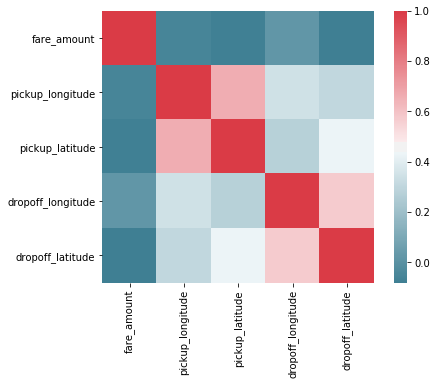

In [51]:
df_corr = Cab_Train.loc[:,cnames]
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [52]:
mod = ols('fare_amount ~ passenger_count', data=Cab_Train).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
passenger_count,319.693583,5.0,4.083144,0.001049
Residual,248714.896431,15883.0,NaN,NaN


In [53]:
mod = ols('fare_amount ~ year', data=Cab_Train).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
year,4679.359116,6.0,50.689578,4.307546e-62
Residual,244355.230899,15882.0,NaN,NaN


In [54]:
mod = ols('fare_amount ~ month ', data=Cab_Train).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
month,522.128699,11.0,3.03253,0.000465
Residual,248512.461315,15877.0,NaN,NaN


In [55]:
mod = ols('fare_amount ~ day', data=Cab_Train).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
day,590.777132,30.0,1.256963,0.157675
Residual,248443.812882,15858.0,NaN,NaN


In [56]:
mod = ols('fare_amount ~ weekday', data=Cab_Train).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
weekday,101.536710,6.0,1.079679,0.371869
Residual,248933.053304,15882.0,NaN,NaN


In [57]:
mod = ols('fare_amount ~ hour', data=Cab_Train).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
hour,1889.676926,23.0,5.274097,2.838268e-15
Residual,247144.913088,15865.0,NaN,NaN


In [58]:
mod = ols('fare_amount ~ timeofday', data=Cab_Train).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
timeofday,448.479321,3.0,9.552819,0.000003
Residual,248586.110694,15885.0,NaN,NaN


In [59]:
Cab_Train = Cab_Train.drop(['weekday','day'], axis=1)


In [60]:
Cab_Train.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count       object
year                  object
month                 object
hour                  object
timeofday             object
dtype: object

In [83]:

# _1+passenger_count_2+passenger_count_3+passenger_count_4+passenger_count_5+passenger_count_6
outcome, predictors = dmatrices('fare_amount ~ pickup_longitude+passenger_count+pickup_latitude+dropoff_longitude +dropoff_latitude',Cab_Train, return_type='dataframe')
# calculating VIF for each individual Predictors
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
vif["features"] = predictors.columns
vif

,VIF,features
0,9.214154e+07,Intercept
1,1.031360e+00,passenger_count[T.2.0]
2,1.015737e+00,passenger_count[T.3.0]
3,1.008432e+00,passenger_count[T.4.0]
4,1.021118e+00,passenger_count[T.5.0]
5,1.007360e+00,passenger_count[T.6.0]
6,1.886332e+00,pickup_longitude
7,1.998792e+00,pickup_latitude
8,1.585502e+00,dropoff_longitude
9,1.703703e+00,dropoff_latitude


In [63]:
y = np.array(Cab_Train['passenger_count'])
train_set,validation_set = train_test_split(Cab_Train, test_size = 0.2, stratify = y) 

In [64]:
######c50#######
fit_DT = DecisionTreeRegressor(max_depth=2).fit(train_set.iloc[:,1:10], train_set.iloc[:,0])
predictions_DT = fit_DT.predict(validation_set.iloc[:,1:10])

In [65]:
def MAPE(y_true,y_pred):
    mape=np.mean(np.abs((y_true-y_pred)/y_true))*100
    return mape

In [66]:
MAPE(validation_set.iloc[:,0],predictions_DT)

37.78790177142182

In [67]:
RF_model = RandomForestRegressor(n_estimators = 500).fit(train_set.iloc[:,1:10], train_set.iloc[:,0])
RF_Predictions = RF_model.predict(validation_set.iloc[:,1:10])

In [68]:
MAPE(validation_set.iloc[:,0],RF_Predictions)

22.991287919808258

In [69]:
ln_model=sm.OLS(train_set.iloc[:,0],train_set.iloc[:,1:10].astype(float)).fit()
LN_Predictions = ln_model.predict(validation_set.iloc[:,1:10])

In [70]:
MAPE(validation_set.iloc[:,0],LN_Predictions)

38.80605662281014

In [71]:
MAPE(validation_set.iloc[:,0],RF_Predictions)

22.991287919808258

In [72]:
MAPE(validation_set.iloc[:,0],predictions_DT)

37.78790177142182

In [73]:
result=pd.DataFrame(validation_set.iloc[:,0:10])
result['RF_pred_cnt'] = (RF_Predictions)

result.to_csv("Random_Forest_output_Python_on_validation_data.csv",index=False)

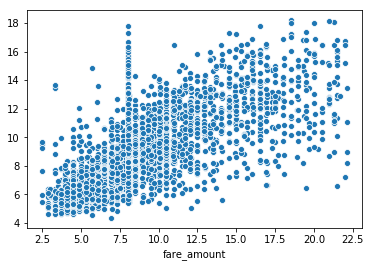

In [74]:
sns.scatterplot(x=validation_set["fare_amount"], y=RF_Predictions)

In [75]:
Cab_Test=pd.read_csv('test.csv',header=0,na_values=["", " ", "NA","0","NaN"])

In [76]:
Cab_Test

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
5,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
6,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
7,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
8,2011-10-06 12:10:20 UTC,-74.014099,40.709638,-73.995106,40.741365,1
9,2014-02-18 15:22:20 UTC,-73.969582,40.765519,-73.980686,40.770725,1


In [77]:
print(breakdatetime(Cab_Test))
Cab_Test.drop('pickup_datetime', axis=1, inplace=True)

0   2015-01-27 13:08:24
1   2015-01-27 13:08:24
2   2011-10-08 11:53:44
3   2012-12-01 21:12:12
4   2012-12-01 21:12:12
Name: pickup_datetime, dtype: datetime64[ns]


In [78]:
Cab_Test = Cab_Test.drop(['weekday','day'], axis=1)

In [79]:
Cab_Test.dtypes

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
year                   int64
month                  int64
hour                   int64
dtype: object

In [80]:
Cab_Test['timeofday'] = Cab_Test['hour'].apply(get_time_of_day)

In [81]:
Cab_Test['year'] =  Cab_Test['year'].astype(object)
Cab_Test['passenger_count'] =  Cab_Test['passenger_count'].astype(object)
Cab_Test['month'] =  Cab_Test['month'].astype(object)
Cab_Test['hour'] =  Cab_Test['hour'].astype(object)
Cab_Test['timeofday'] =  pd.Categorical(Cab_Test['timeofday'])
Cab_Test['timeofday']=Cab_Test['timeofday'].cat.codes
Cab_Test['timeofday'] =  Cab_Test['timeofday'].astype(object)

In [82]:
Cab_Test['Predicted_values'] = RF_model.predict(Cab_Test.iloc[:,0:9])
Cab_Test.to_csv("pred_output_on_test_data(Python).csv",index=False)